# Práctica de Interpolación

Mario Líndez Martínez

### Recrearemos el gráfico en el cual se incluyen la función interpolada $f(x)=\frac{1}{1+x^2}$ y las gráficas de los polinomios de grados 6 y 14 que interpolan a $f(x)$ en puntos equiespaciados del intervalo $[-5, 5]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### 1. Construya un array que contenga un conjunto de $n+1$ puntos equiespaciados del intervalo $[-5,5]$.

In [2]:
def puntos(n = 14):
    """
    Calculará n+1 puntos equidistantes entre -5 y 5
    """
    x = np.zeros([n+1])

    for k in range (0, n+1):
        x[k] = -5 + ((10*k)/n)
    
    return (x)

In [3]:
x6 = puntos(6)
print ("x6 = ", x6, "\n")

x14 = puntos (14)
print ("x14 = ", x14, "\n")

x6 =  [-5.         -3.33333333 -1.66666667  0.          1.66666667  3.33333333
  5.        ] 

x14 =  [-5.         -4.28571429 -3.57142857 -2.85714286 -2.14285714 -1.42857143
 -0.71428571  0.          0.71428571  1.42857143  2.14285714  2.85714286
  3.57142857  4.28571429  5.        ] 



##### 2. Construya un array que contenga las imágenes mediante $f$ de los puntos anteriores.

In [4]:
def f(x):
    """
    Funcion a interpolar
    """
    return (1/(1+x**2))

In [5]:
y6 = f(x6)
print ("y6 = ", y6, "\n")

y14 = f(x14)
print ("y6 = ", y14, "\n")

y6 =  [0.03846154 0.08256881 0.26470588 1.         0.26470588 0.08256881
 0.03846154] 

y6 =  [0.03846154 0.0516333  0.0727003  0.1091314  0.17883212 0.32885906
 0.66216216 1.         0.66216216 0.32885906 0.17883212 0.1091314
 0.0727003  0.0516333  0.03846154] 



##### 3. Construya una función en Python que a partir de los arrays anteriores calcule la tabla de diferencias divididas. Dicha función debe devolver sólo los coeficientes del polinomio de interpolación en su forma de Newton

In [6]:
def DiferenciasDivididas (x, y):
    """
    Funcion que devuelve una matriz que represente la tabla de diferencias divididas de un vector de puntos x y su vector
    de imagenes asociadas
    """
    
    n = len(x)
    A = np.zeros([n, n])
    
    for i in range (0, n):
        A[i, 0] = y[i]
    
    for j in range (1, n):
        for i in range (j, n):
            A[i, j] = (A[i,j-1] - A[i-1,j-1])/(x[i] - x[i-j])
            
    return (A)

In [7]:
def CoeficientesNewton (x, y):
    """
    Esta funcion devolverá un vector que contendrá los coeficientes de Newton de un polinomio de interpolacion de puntos x
    e imagenes y
    """
    
    difdivididas = DiferenciasDivididas (x, y)
    
    n = len(difdivididas)
    A = np.zeros(n)
    
    
    for i in range (0, n):
        A[i] = difdivididas[i, i]
        
    return (A)

In [8]:
coeficientes6 = CoeficientesNewton (x6, y6)
print ("Coeficientes6 = \n", coeficientes6, "\n")

coeficientes14 = CoeficientesNewton (x14, y14)
print ("Coeficientes14 = \n", coeficientes14, "\n")

Coeficientes6 = 
 [ 0.03846154  0.02646436  0.02484537  0.01494458 -0.01316991  0.00420316
 -0.00084063] 

Coeficientes14 = 
 [ 3.84615385e-02  1.84404636e-02  7.73733400e-03  3.41576279e-03
  1.67055663e-03  8.38758618e-04  8.39510789e-05 -7.78793561e-04
  3.12759078e-04  3.57126262e-05 -7.87405270e-05  3.90679520e-05
 -1.25343013e-05  3.06783597e-06 -6.13567195e-07] 



##### 4. Construya una función en Python que a partir del array de puntos y del array de coeficientes proporcione el valor del polinomio interpolación de Newton en un punto x.

In [13]:
def PolInterp (puntos, coef, x):
    """
    Funcion que a traves de un array de puntos de interpolacion y sus coeficientes de Newton evaluara su polinomio de
    interpolacion en el punto x dado a traves del metodo de Newton-Horner
    """
    
    n = len(coef) - 1
    
    xn = puntos
    dn = coef
    
    bn = dn[n]
    print (bn)
        
    for i in range (n, 0, -1):
        bn = dn[i-1] + bn*(x - xn[i-1])
        
    return (bn)

In [14]:
print (PolInterp (x6, coeficientes6, 0))

[ 0.03846154  0.02646436  0.02484537  0.01494458 -0.01316991  0.00420316
 -0.00084063]
-0.0008406326539084231
0.9999999999999999


##### 5. Utilice la función anterior para construir la gráfica pedida.

In [11]:
#Puntos a representar
pt = np.arange(-5, 5.1, 0.1)

#Imagen del polinomio de grado 6
Imgx6 = PolInterp (x6, coeficientes6, pt)

#Imagen del polinomio de grado 14
Imgx14 = PolInterp (x14, coeficientes14, pt)

#Imagen de la funcion
Img = f(pt)

[ 0.03846154  0.02646436  0.02484537  0.01494458 -0.01316991  0.00420316
 -0.00084063]
[ 3.84615385e-02  1.84404636e-02  7.73733400e-03  3.41576279e-03
  1.67055663e-03  8.38758618e-04  8.39510789e-05 -7.78793561e-04
  3.12759078e-04  3.57126262e-05 -7.87405270e-05  3.90679520e-05
 -1.25343013e-05  3.06783597e-06 -6.13567195e-07]


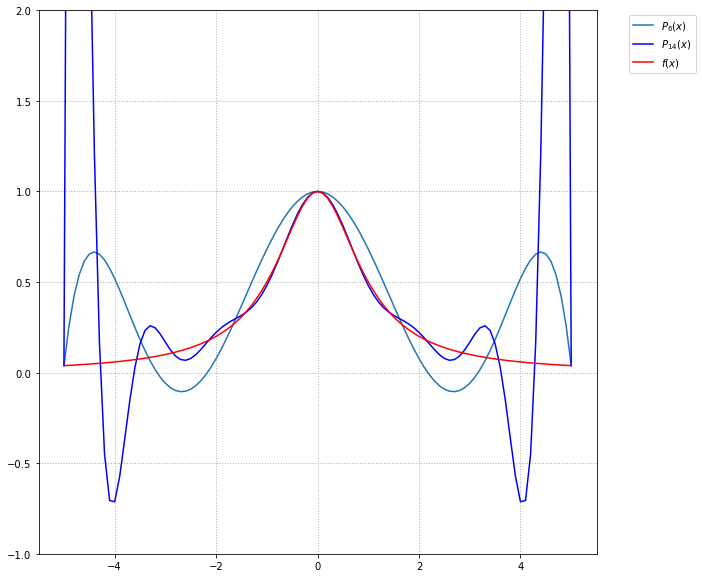

In [12]:
#Crearemos la gráfica

#Tamaño de la imagen
plt.rcParams["figure.figsize"] = (10, 10)

#Añadimos las 3 figuras
plt.plot(pt, Imgx6, label = "$P_6(x)$")
plt.plot(pt, Imgx14, color="blue", label = "$P_{14}(x)$")
plt.plot(pt, Img, color = "red", label = "$f(x)$")

#Creamos la leyenda
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

#Establecemos un límite para la y
plt.ylim(-1, 2)

#Mostramos el grid y mostramos la gráfica
plt.grid(linestyle='dotted', linewidth=1)
plt.show()